<a href="https://colab.research.google.com/github/bengtlofgren/ML_Dump/blob/main/SL_CW2_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from dataclasses import dataclass
from matplotlib import pyplot as plt

In [ ]:
!wget http://www0.cs.ucl.ac.uk/staff/M.Herbster/SL/misc/twomoons.dat
!wget http://www0.cs.ucl.ac.uk/staff/M.Herbster/SL/misc/dtrain123.dat

--2021-12-13 11:14:15--  http://www0.cs.ucl.ac.uk/staff/M.Herbster/SL/misc/twomoons.dat
Resolving www0.cs.ucl.ac.uk (www0.cs.ucl.ac.uk)... 128.16.6.8
Connecting to www0.cs.ucl.ac.uk (www0.cs.ucl.ac.uk)|128.16.6.8|:80... connected.
HTTP request sent, awaiting response... 200 Document follows
Length: 9800 (9.6K) [text/plain]
Saving to: ‘twomoons.dat’

twomoons.dat        100%[===================>]   9.57K  33.2KB/s    in 0.3s    

2021-12-13 11:14:16 (33.2 KB/s) - ‘twomoons.dat’ saved [9800/9800]

--2021-12-13 11:14:16--  http://www0.cs.ucl.ac.uk/staff/M.Herbster/SL/misc/dtrain123.dat
Resolving www0.cs.ucl.ac.uk (www0.cs.ucl.ac.uk)... 128.16.6.8
Connecting to www0.cs.ucl.ac.uk (www0.cs.ucl.ac.uk)|128.16.6.8|:80... connected.
HTTP request sent, awaiting response... 200 Document follows
Length: 555910 (543K) [text/plain]
Saving to: ‘dtrain123.dat’

dtrain123.dat       100%[===================>] 542.88K  45.4KB/s    in 12s     

2021-12-13 11:14:29 (44.3 KB/s) - ‘dtrain123.dat’ saved [55591

In [ ]:
@dataclass
class SpectralCluster:
    X : np.array
    sigma : float
    
    def __post_init__(self):
        
        #Stores indices of which rows belong to which cluster
        #Cluster 2 indicates sign(v_{i}) = -1
        self.cluster1 = set()
        self.cluster2 = set()
        
        self.W = self.compute_W()
        self.L = self.compute_L()
        
        #lambdas correspond to ascending eigenvalues
        #vs correspond to eigenvectors sorted along columns by 
        #corresponding eigenvalue - ascending
        self.lambdas, self.vs = np.linalg.eigh(self.L)
        
        #second eigenvector
        self.v2 = self.vs[:,1]

        self.cluster()
    
    def spectral_func(self, i: int, j: int):
        distance = np.linalg.norm(self.X[i] - self.X[j])**2
        return np.exp(-self.sigma * distance)


    def compute_W(self):
        W = np.zeros((self.X.shape[0], self.X.shape[0])).astype(float)
        for i in range(len(self.X)):
            for j in range(i+1):
                W[i][j] = self.spectral_func(i,j)
                
                #Symmetrical matrix
                W[j][i] = W[i][j]
        
        return W

    def compute_L(self):
        D = np.diag(np.sum(self.W, axis = 1))
        assert D.shape == self.W.shape, D.shape
        
        return D - self.W

    def cluster(self):
        for i in range(len(self.X)):
            if self.v2[i] >= 0:
                self.cluster1.add(i)
            else:
                self.cluster2.add(i)
            

    
    

Q1)

In [ ]:
two_moons = pd.read_csv('twomoons.dat', header = None, delim_whitespace=True).to_numpy()

In [ ]:
sc = SpectralCluster(two_moons, 1)

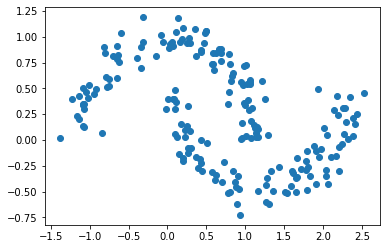

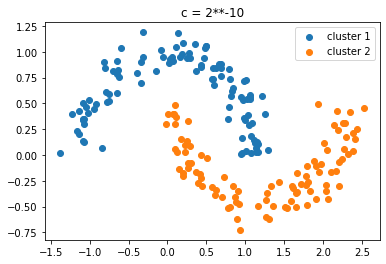

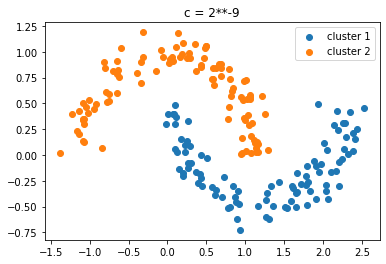

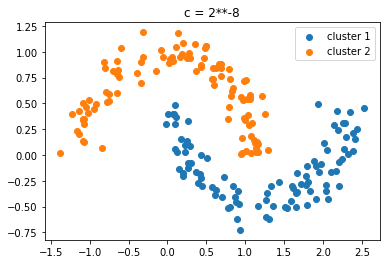

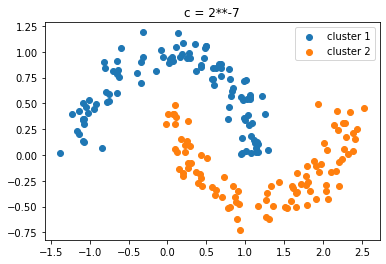

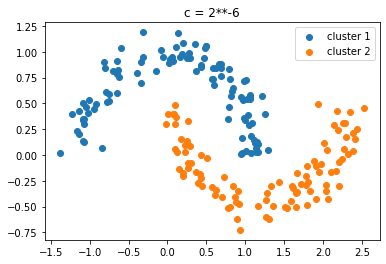

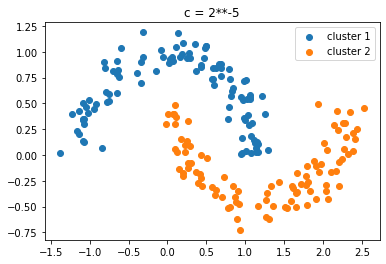

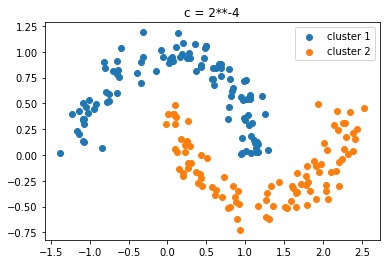

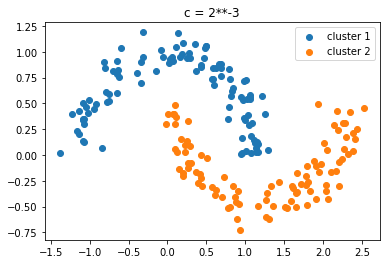

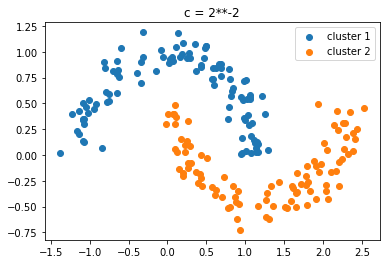

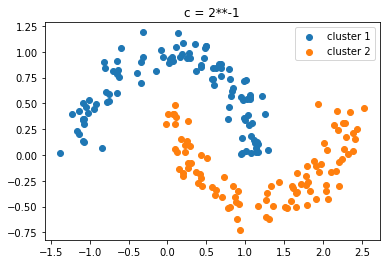

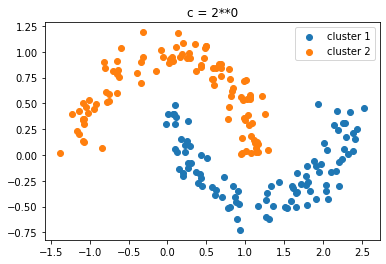

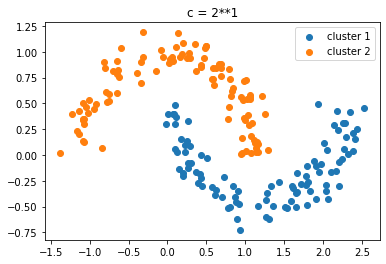

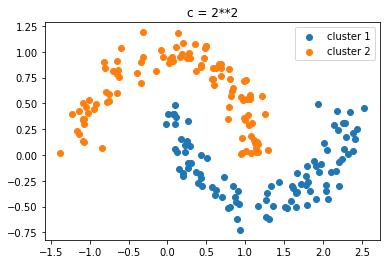

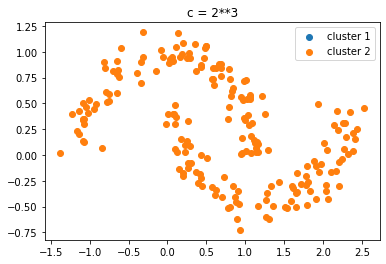

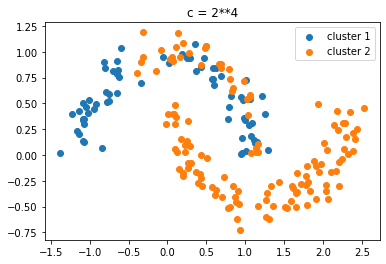

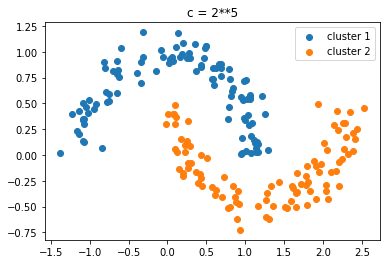

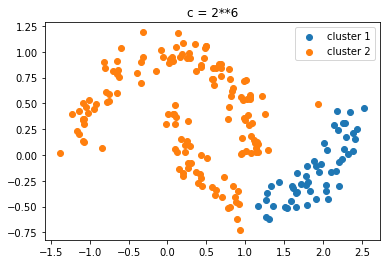

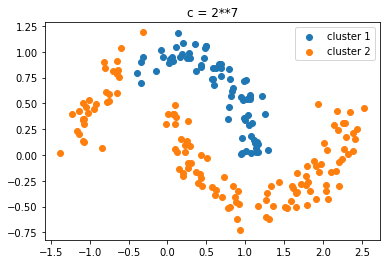

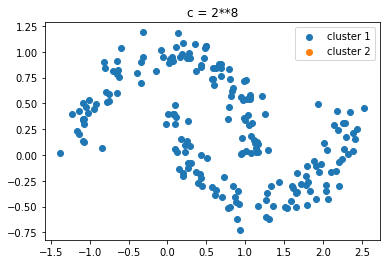

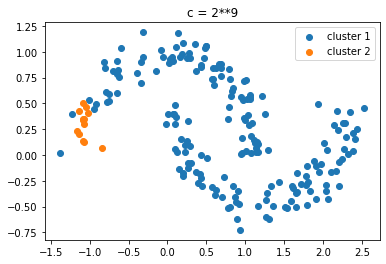

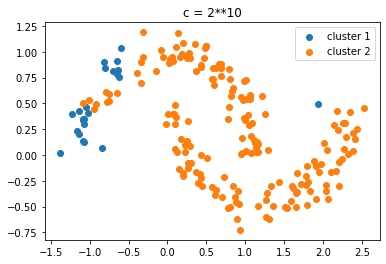

In [ ]:
plt.figure()
plt.scatter(two_moons[:,1], two_moons[:,2])
plt.title('Plot of original two moons data')
plt.show()

x_1, x_2 = two_moons[:,1], two_moons[:,2]

# why do we pick c = 1 since most cs have the desired results
# for i in np.arange(start=-10, stop=11, step=0.1):
for i in range(-10,11):
  sc = SpectralCluster(two_moons, 2**i)


  x_cluster1 = two_moons[list(sc.cluster1)]
  x_cluster2 = two_moons[list(sc.cluster2)]

  plt.figure()
  plt.scatter(x_cluster1[:,1], x_cluster1[:,2], label="cluster 1")
  plt.scatter(x_cluster2[:,1], x_cluster2[:,2], label="cluster 2")
  plt.title(f"Plot of spectral clustering for c = 2**{i} for two moons")
  plt.legend()
  plt.show()

Q2)

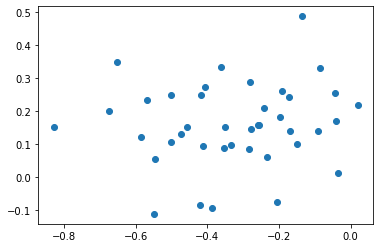

{0, 1, 12, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}
{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19}


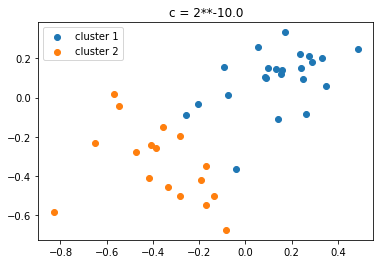

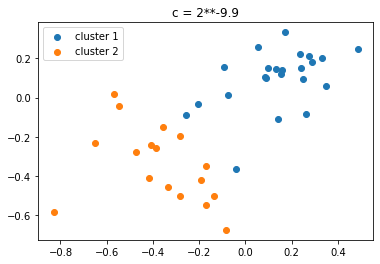

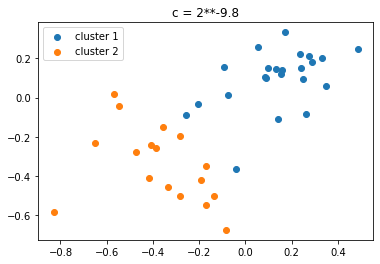

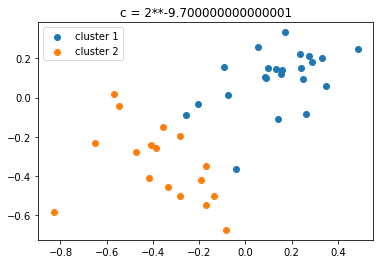

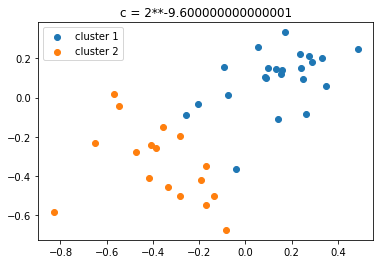

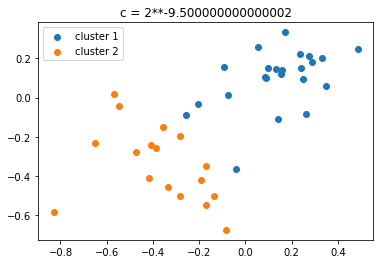

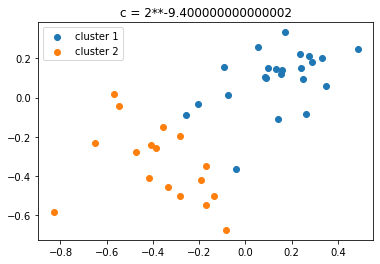

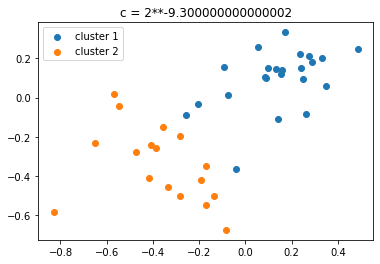

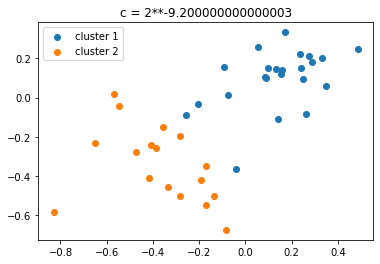

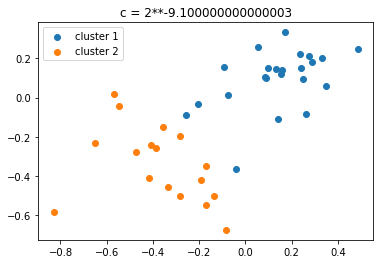

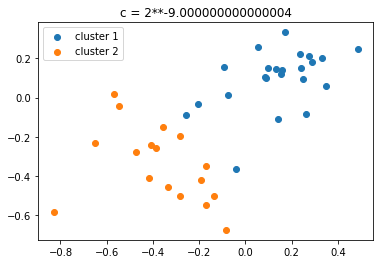

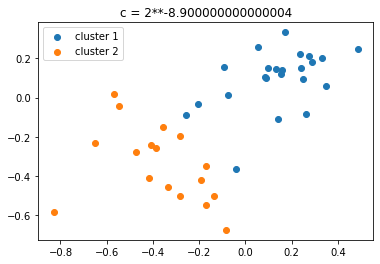

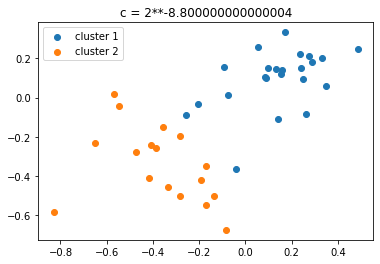

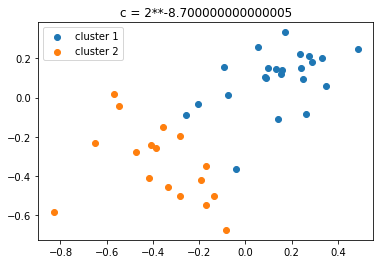

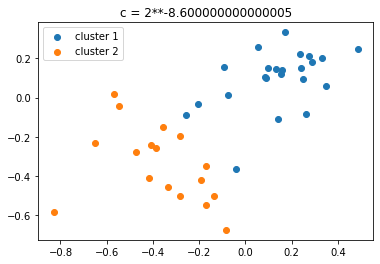

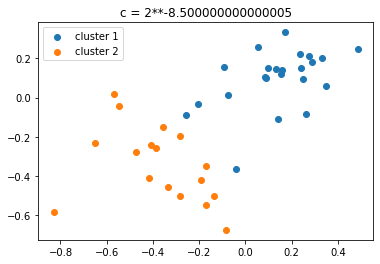

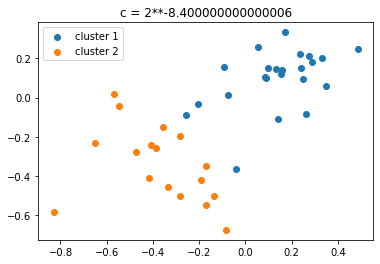

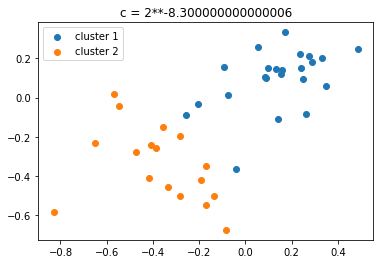

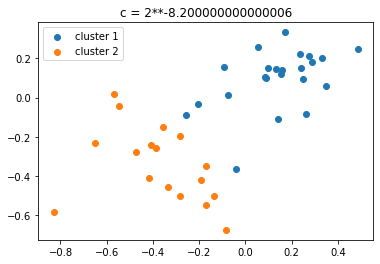

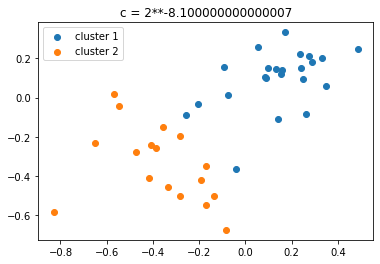

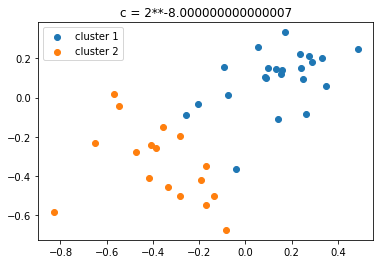

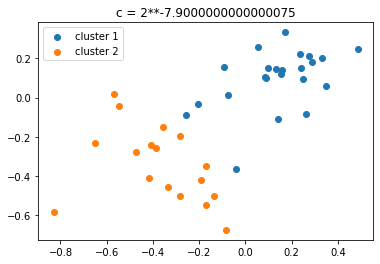

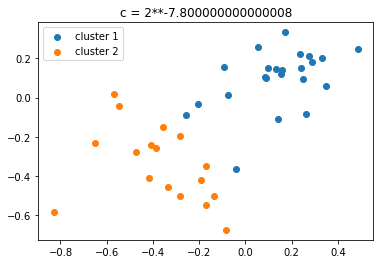

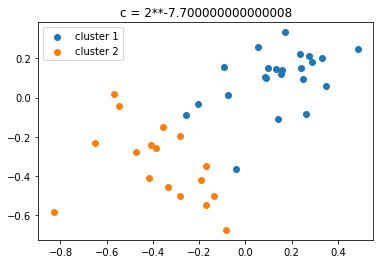

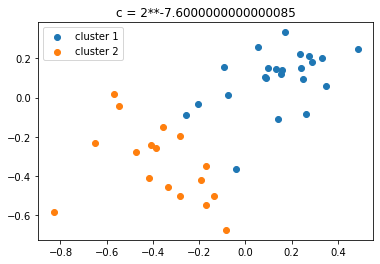

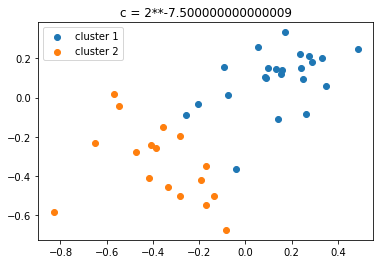

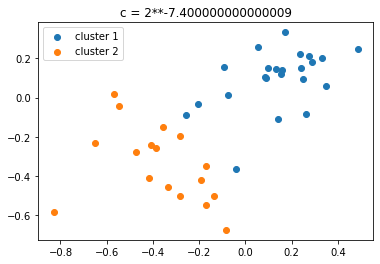

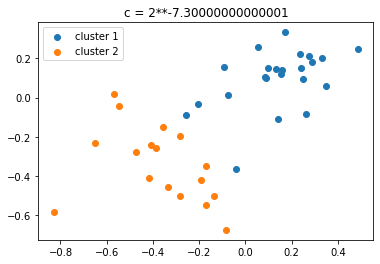

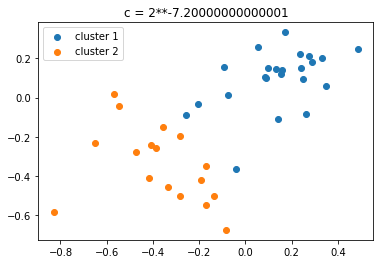

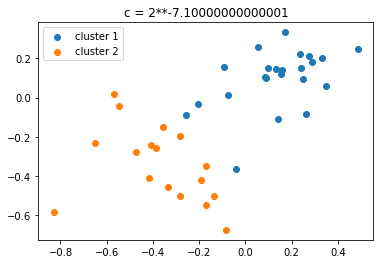

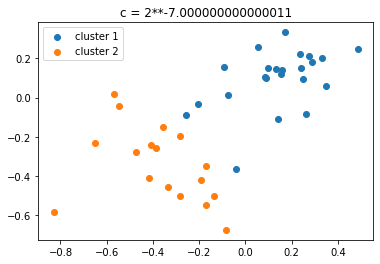

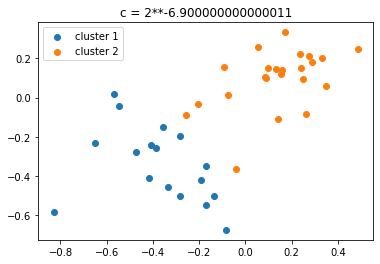

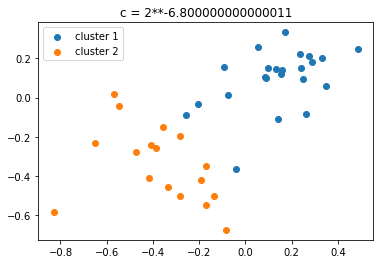

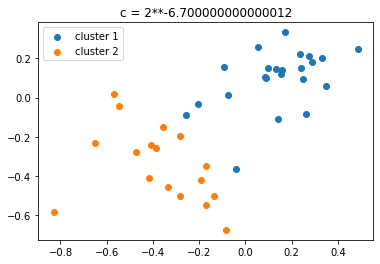

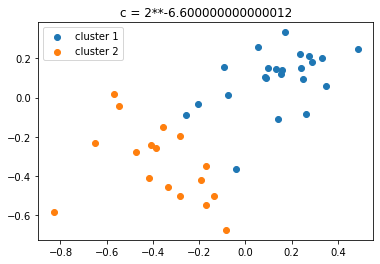

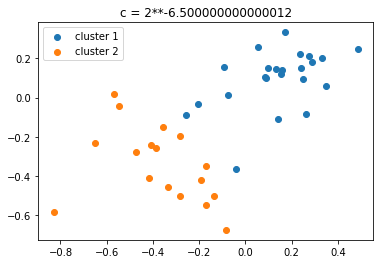

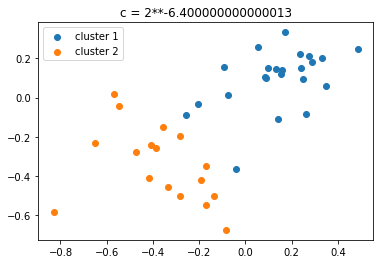

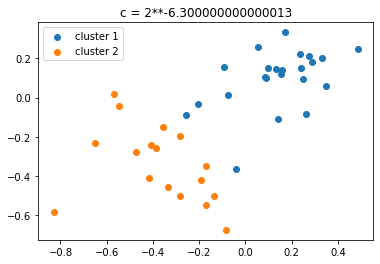

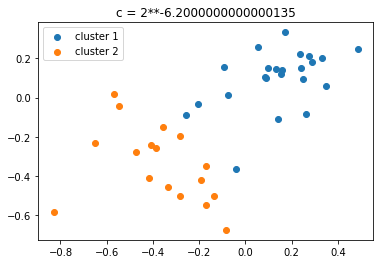

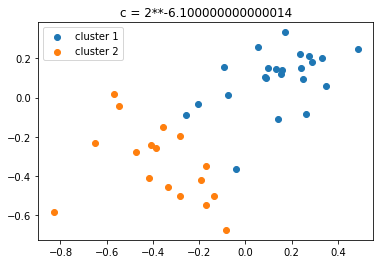

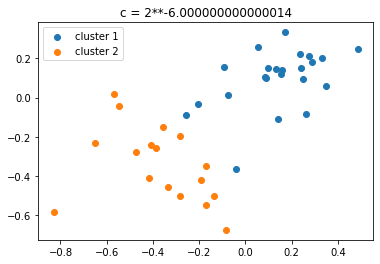

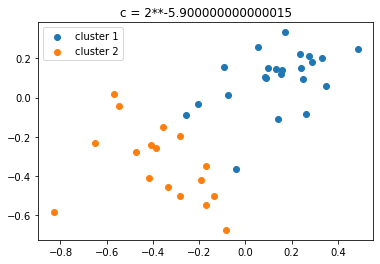

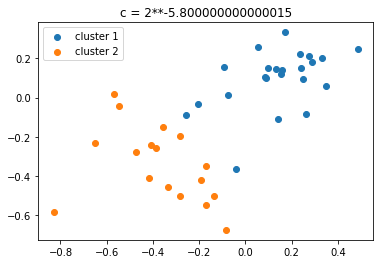

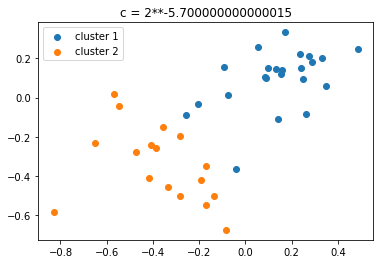

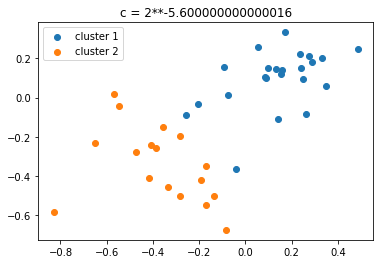

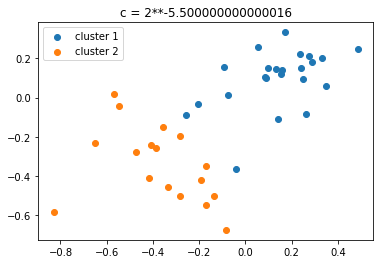

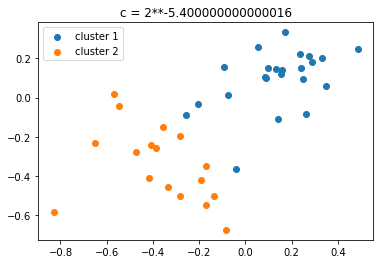

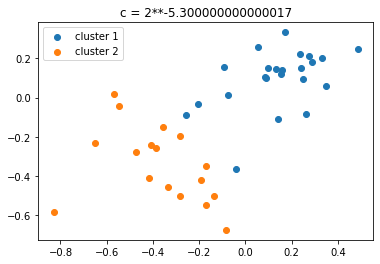

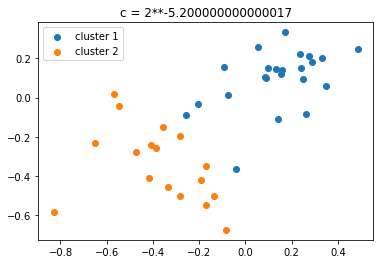

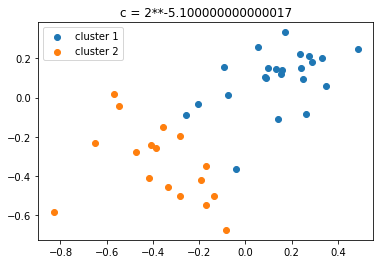

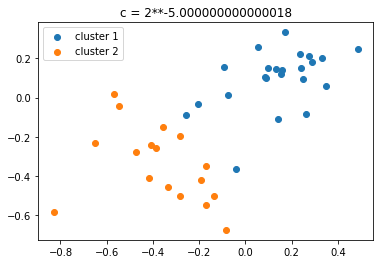

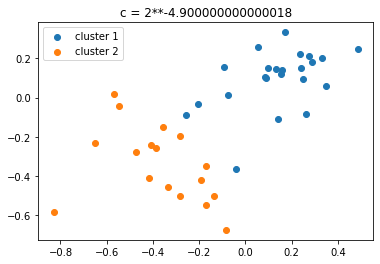

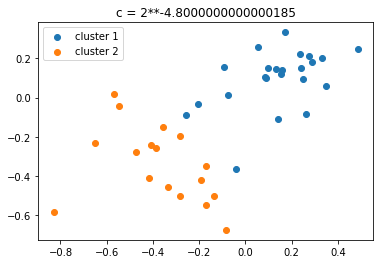

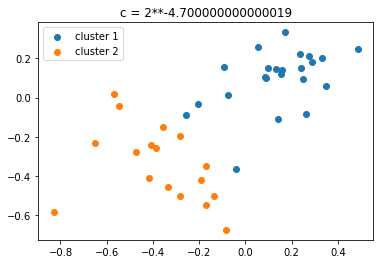

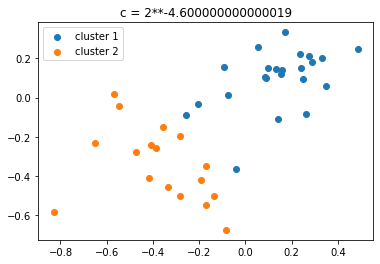

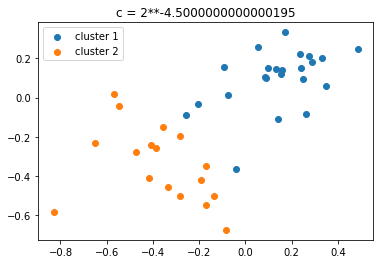

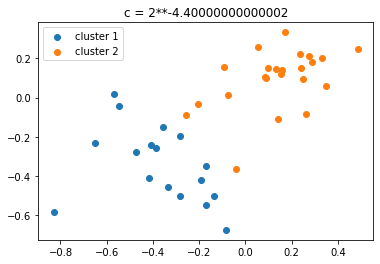

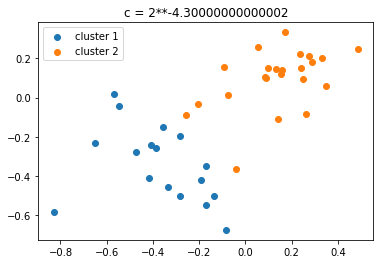

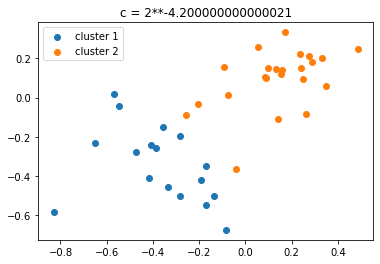

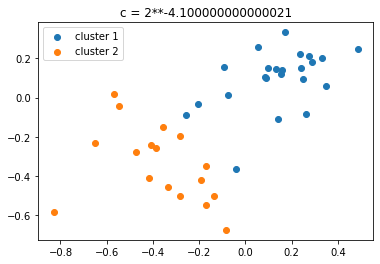

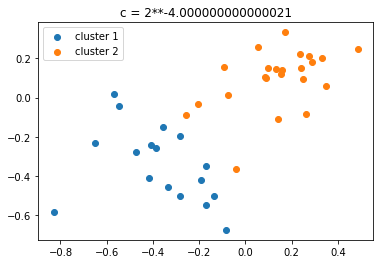

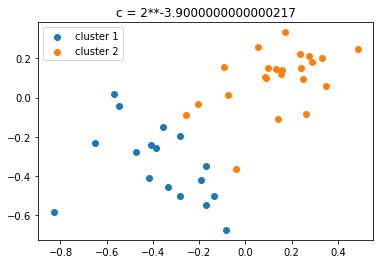

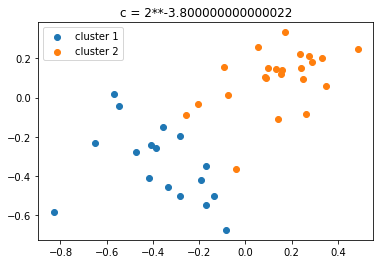

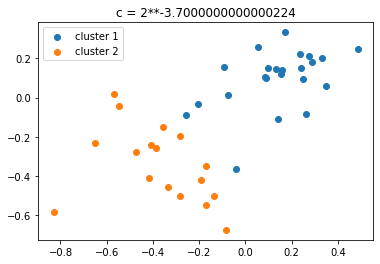

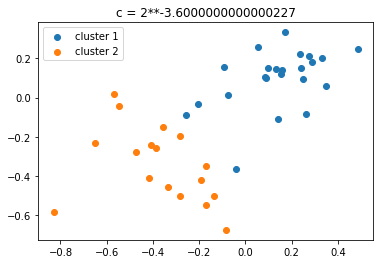

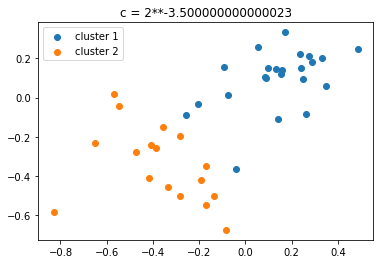

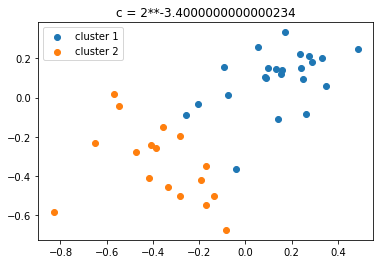

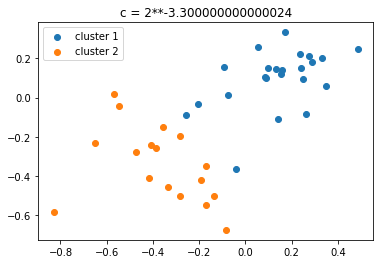

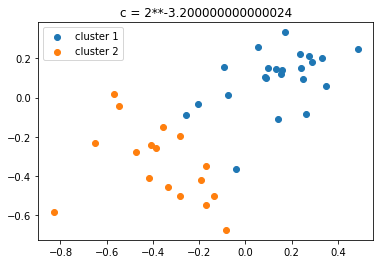

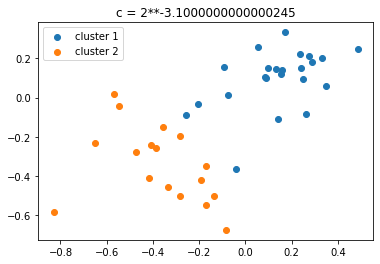

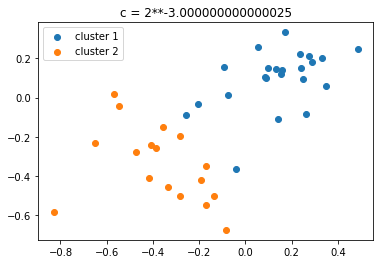

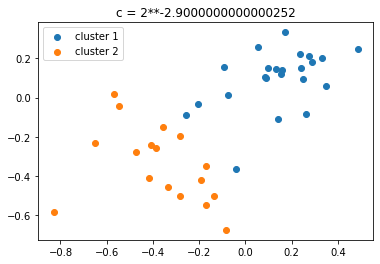

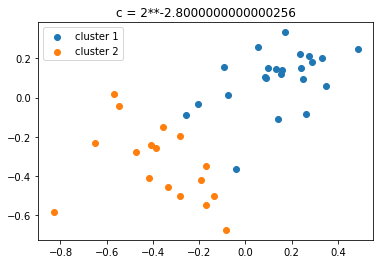

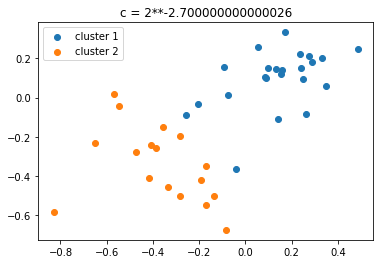

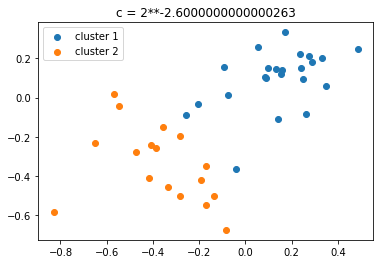

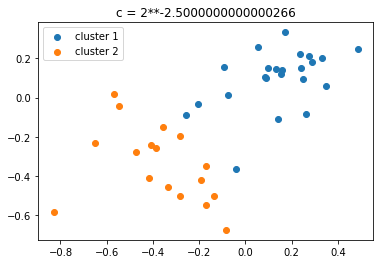

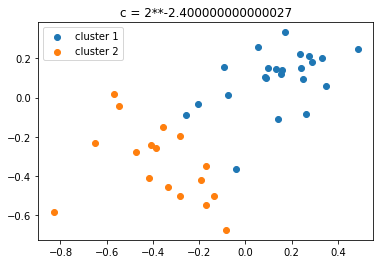

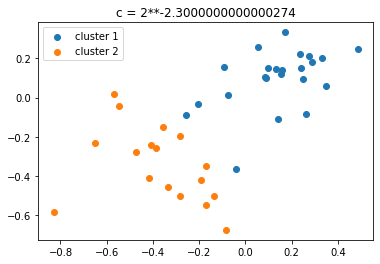

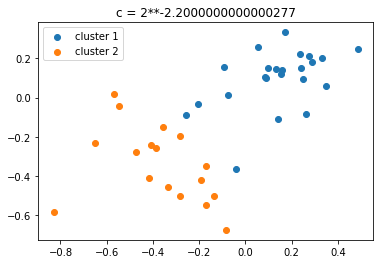

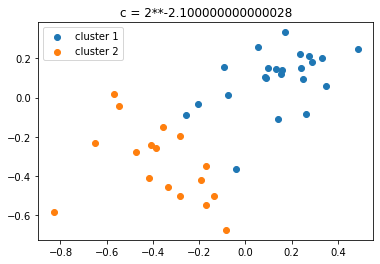

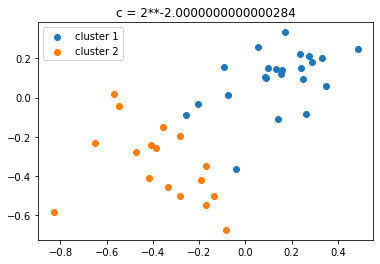

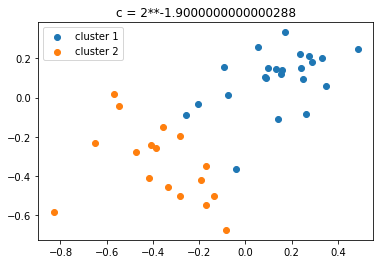

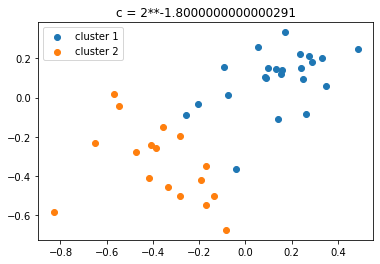

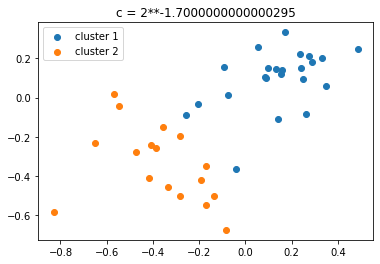

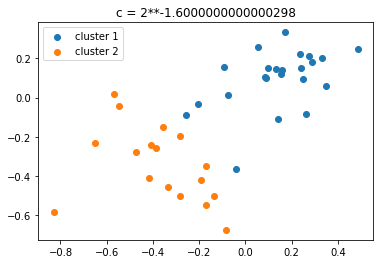

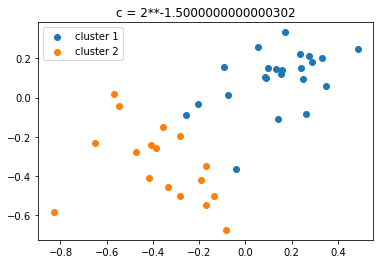

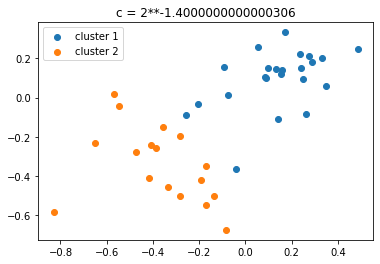

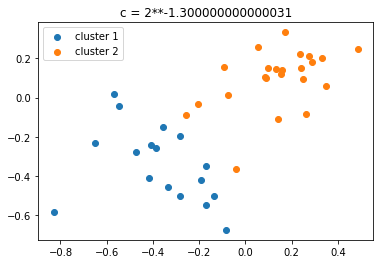

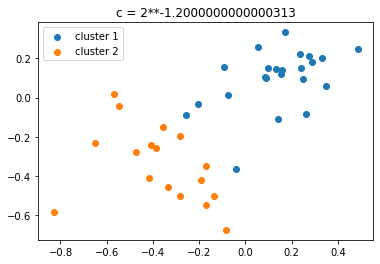

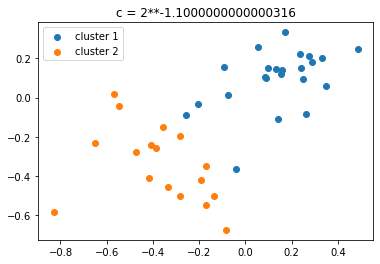

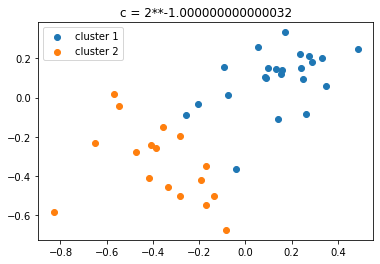

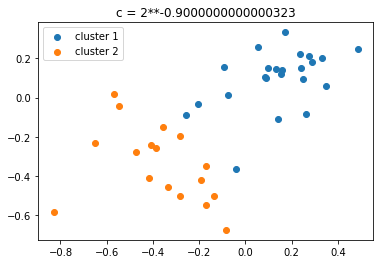

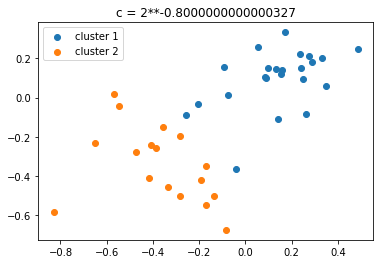

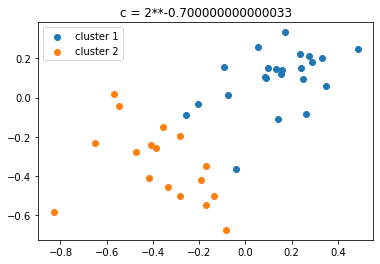

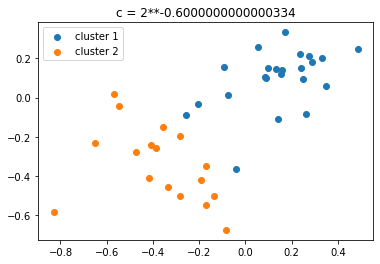

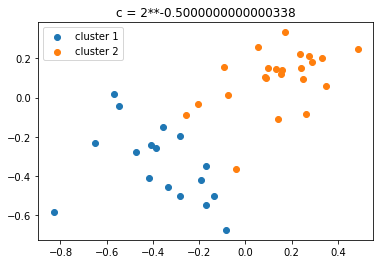

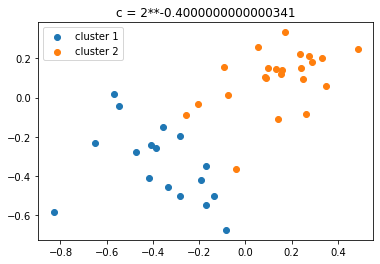

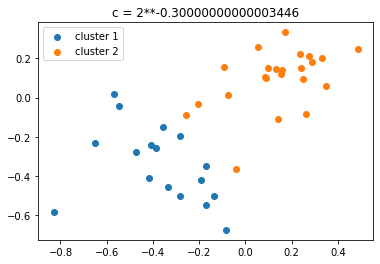

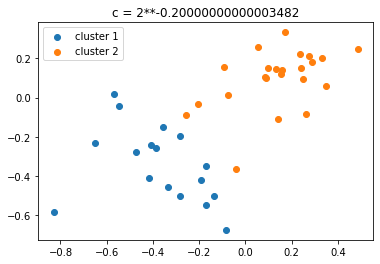

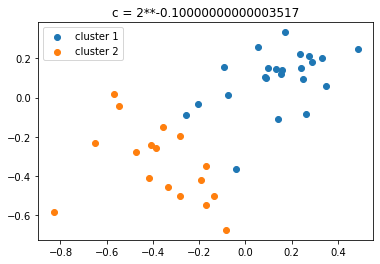

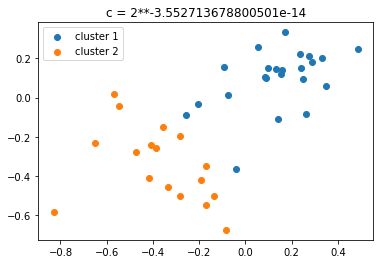

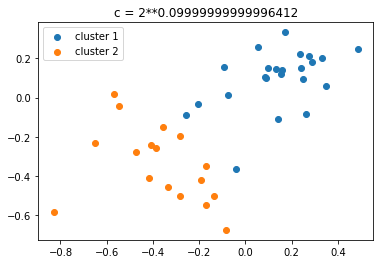

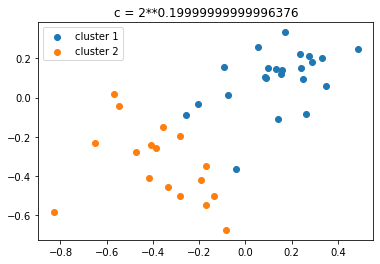

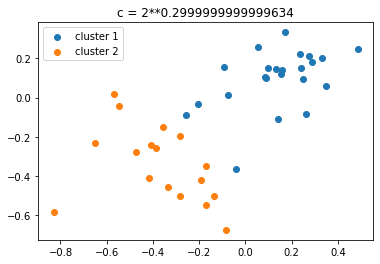

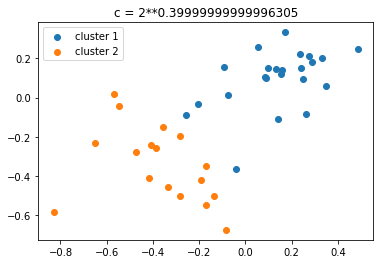

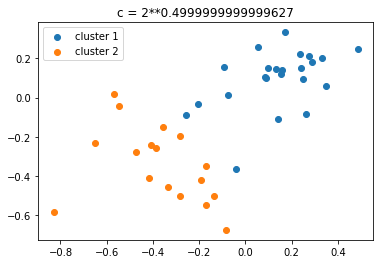

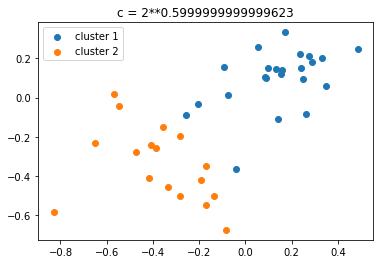

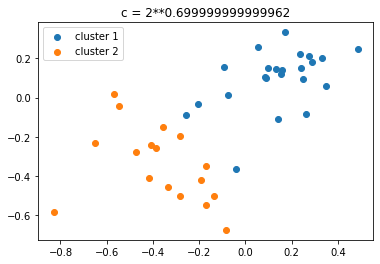

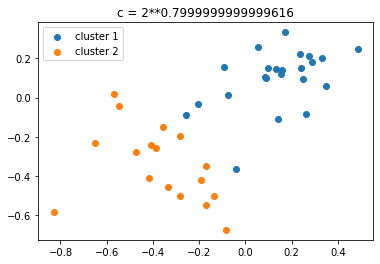

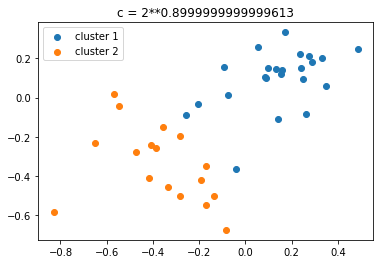

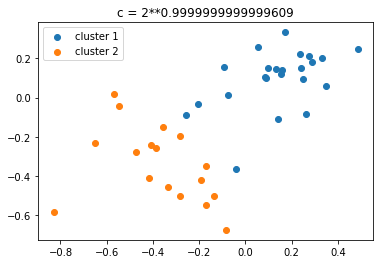

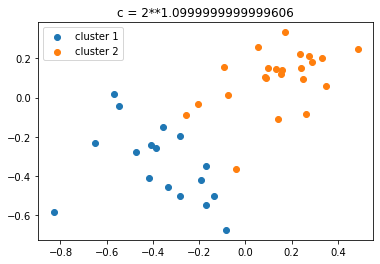

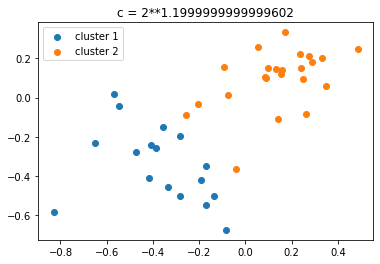

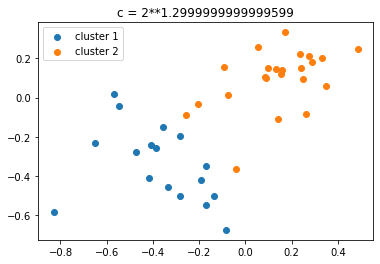

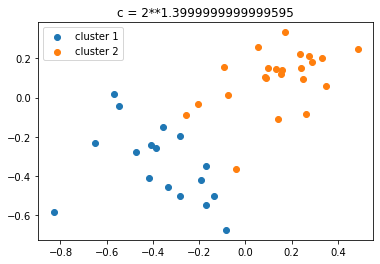

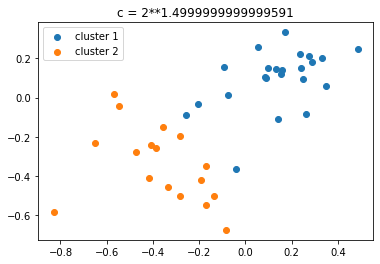

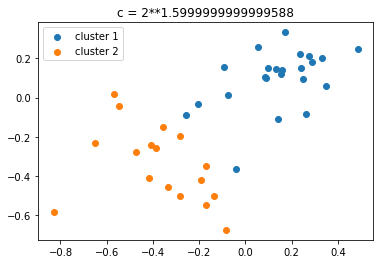

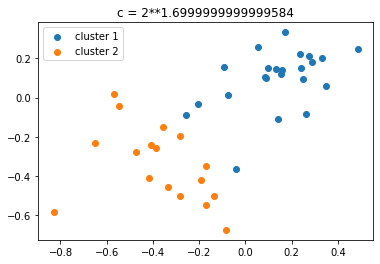

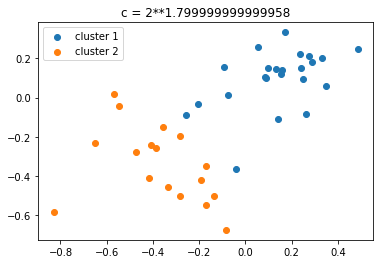

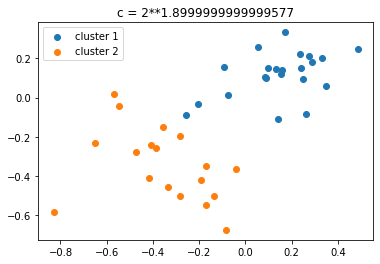

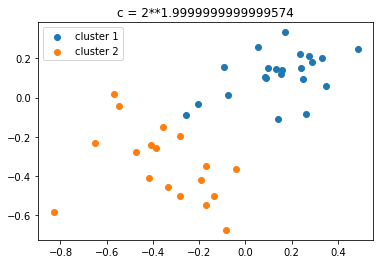

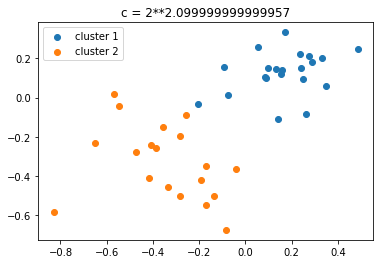

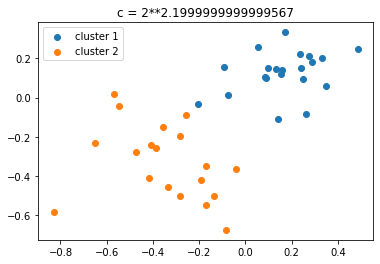

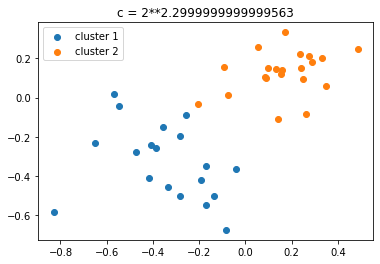

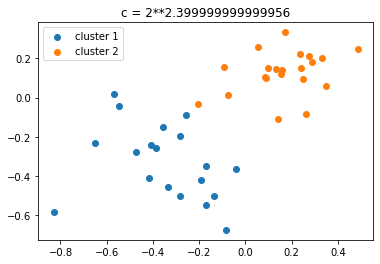

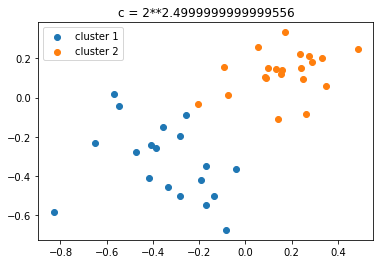

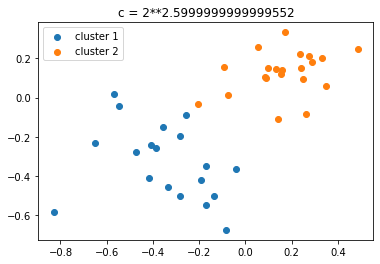

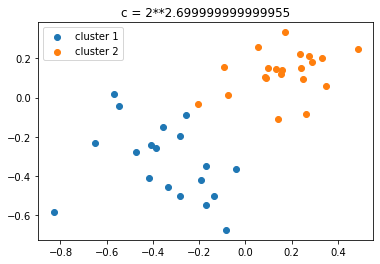

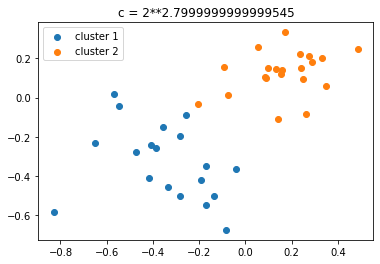

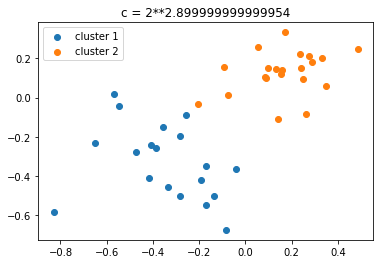

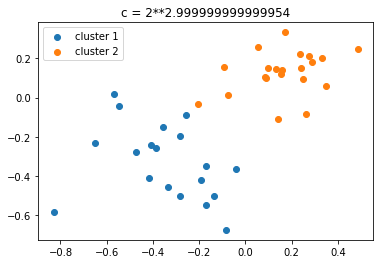

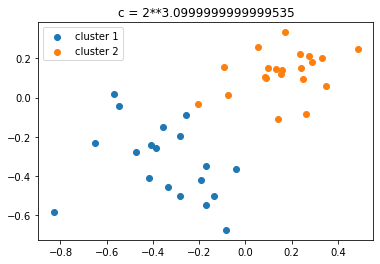

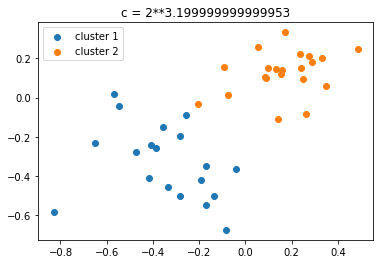

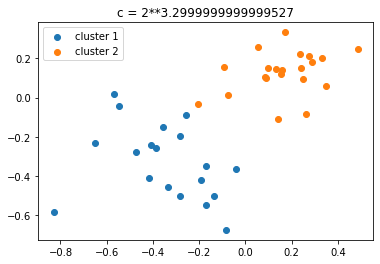

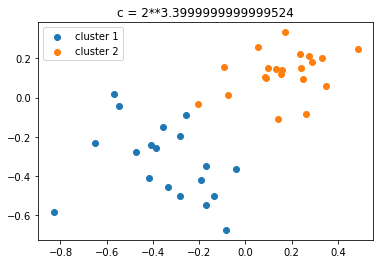

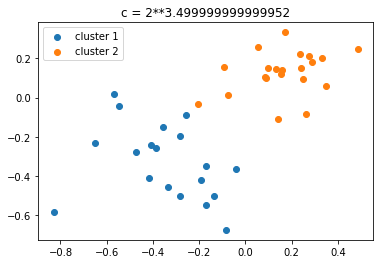

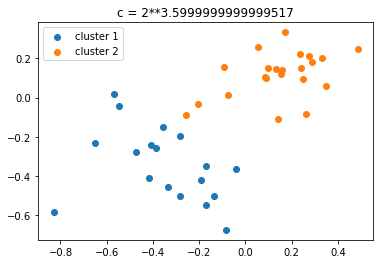

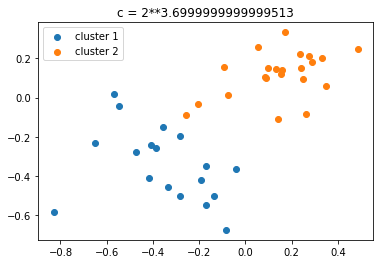

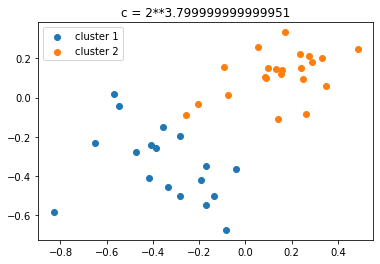

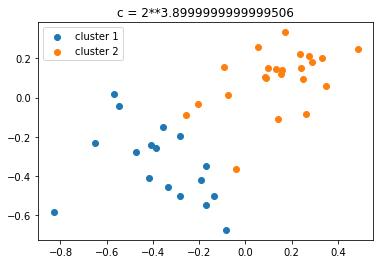

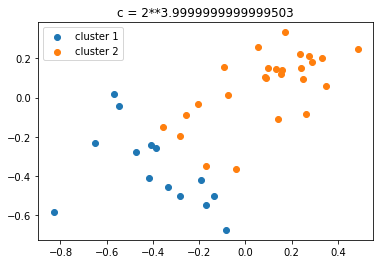

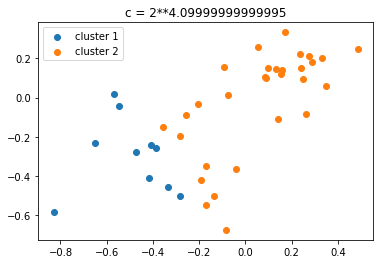

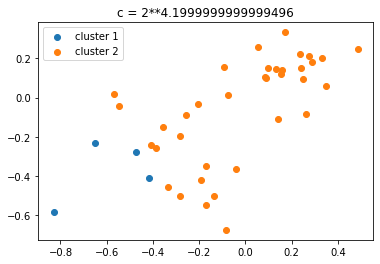

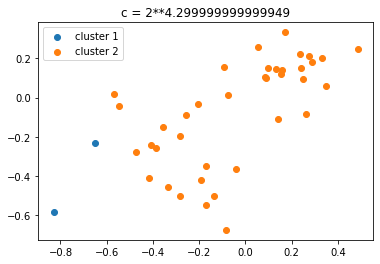

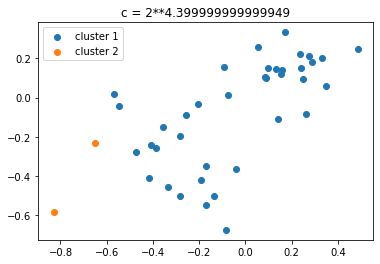

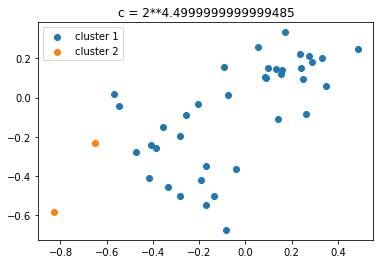

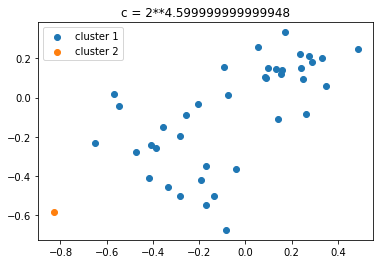

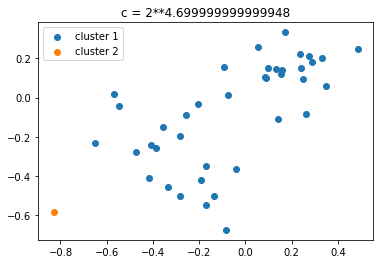

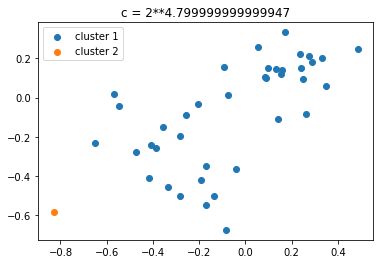

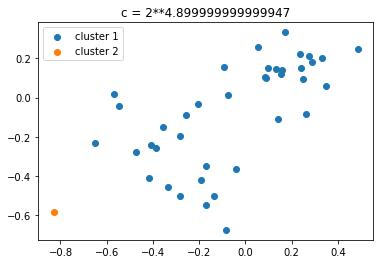

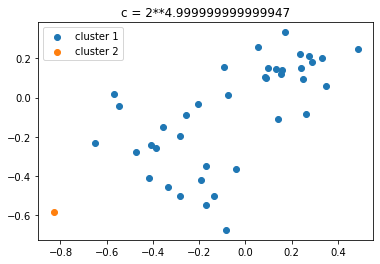

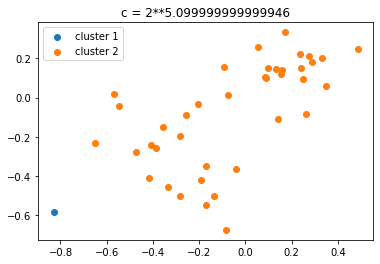

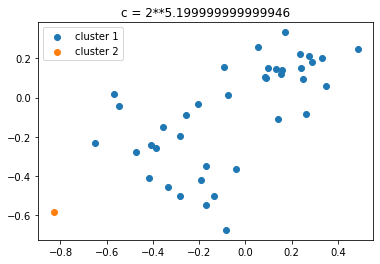

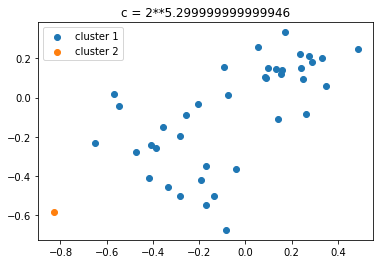

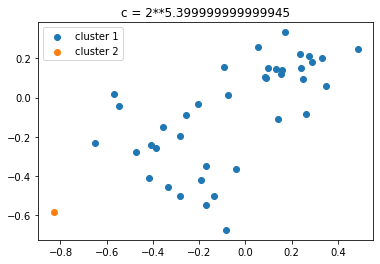

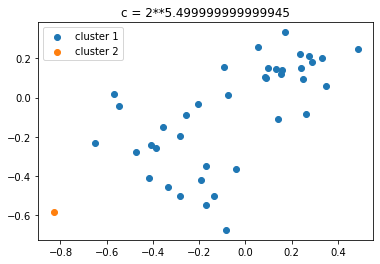

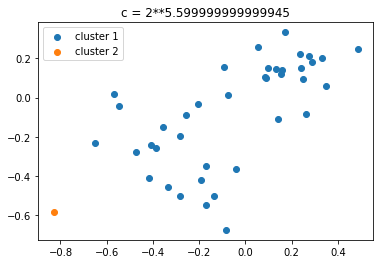

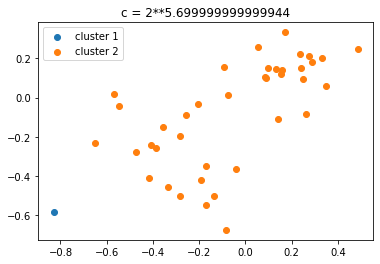

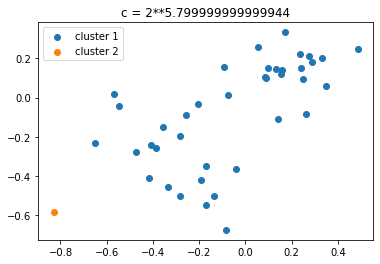

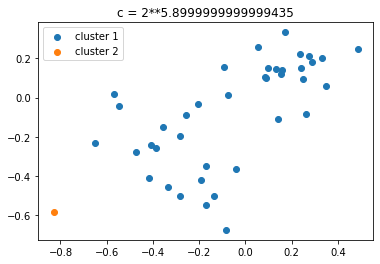

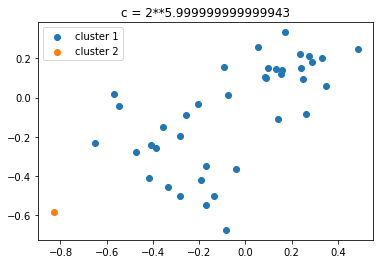

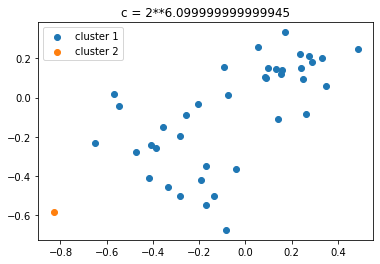

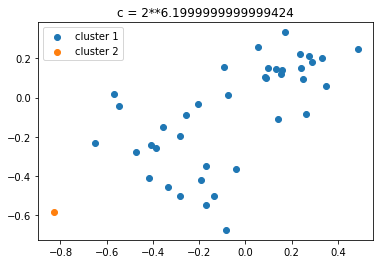

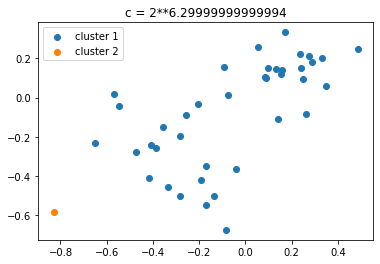

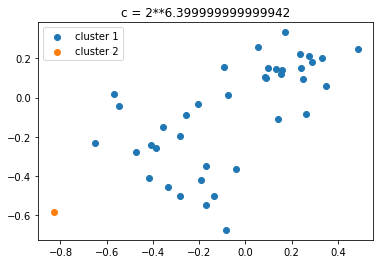

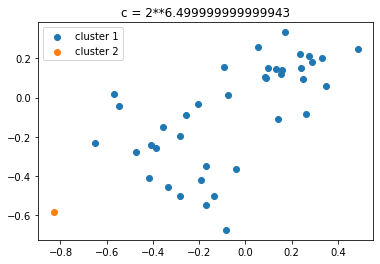

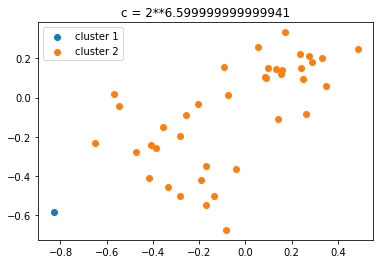

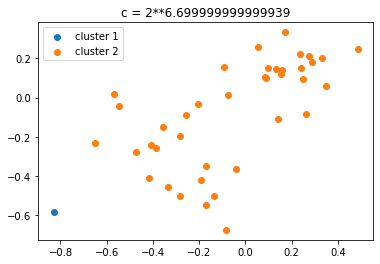

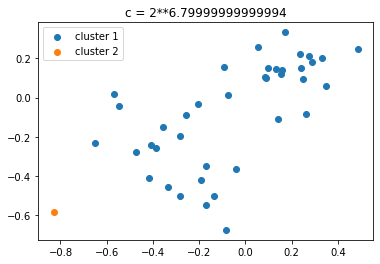

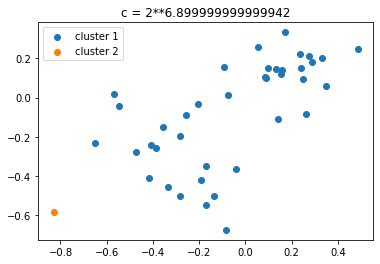

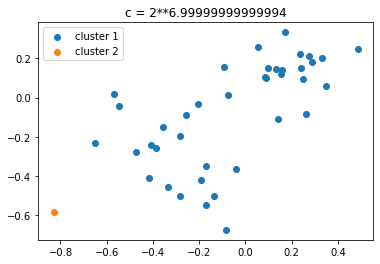

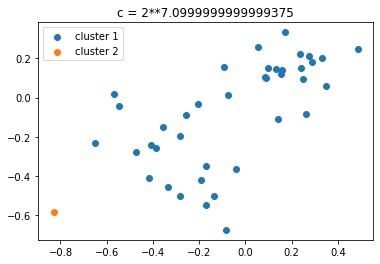

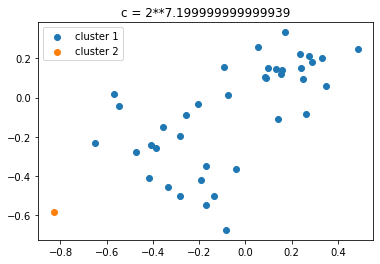

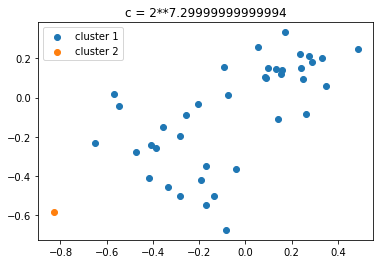

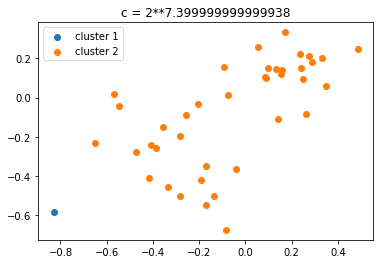

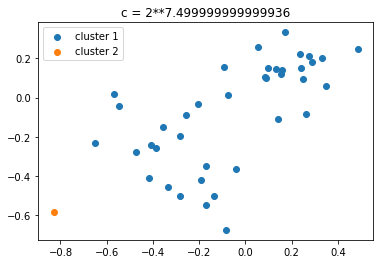

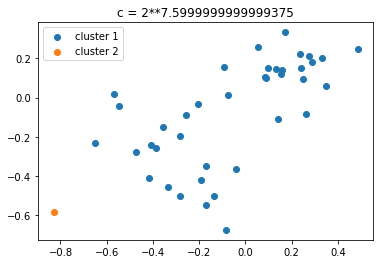

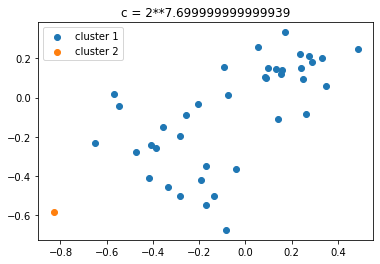

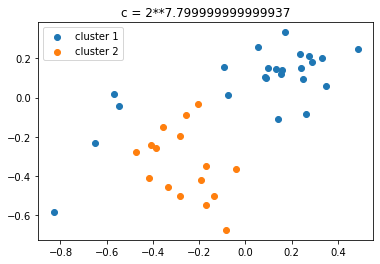

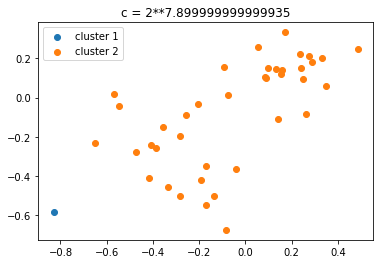

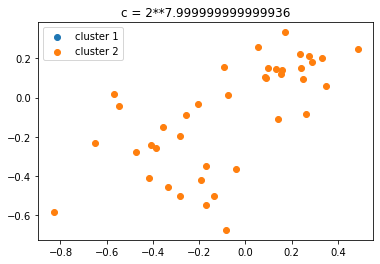

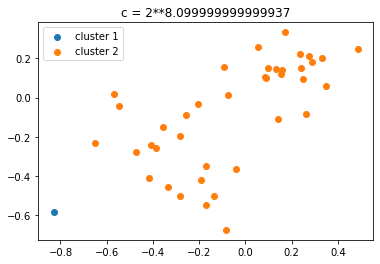

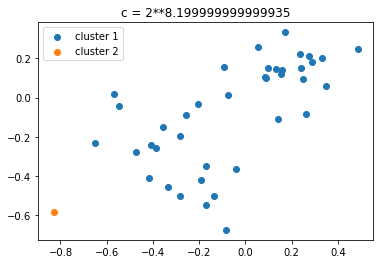

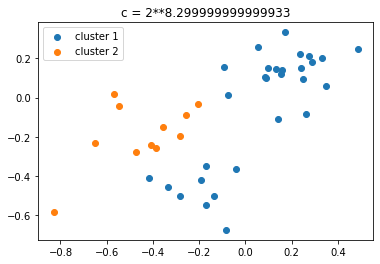

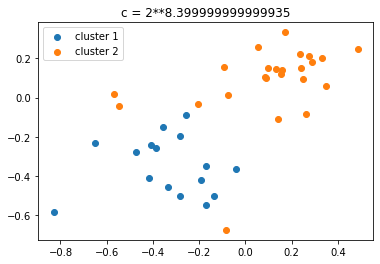

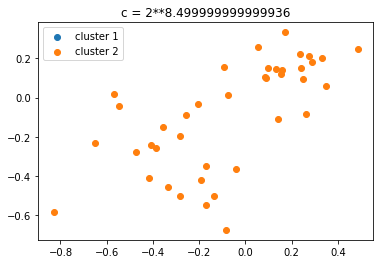

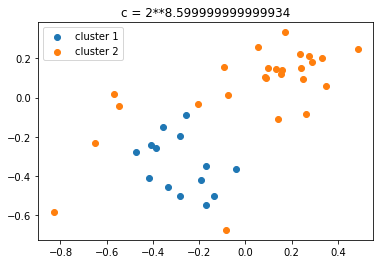

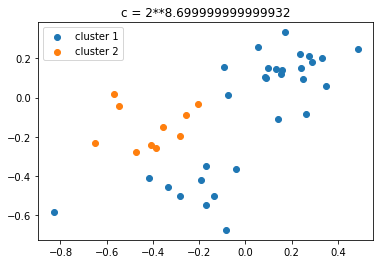

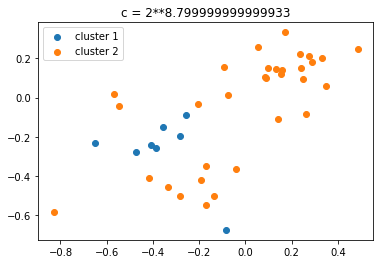

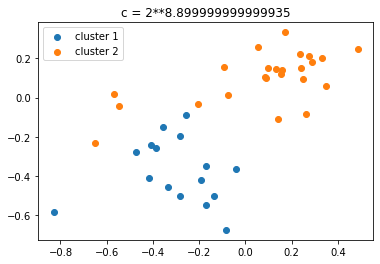

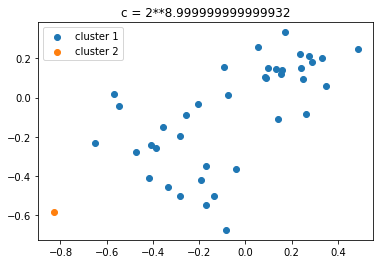

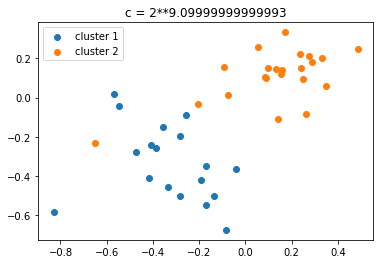

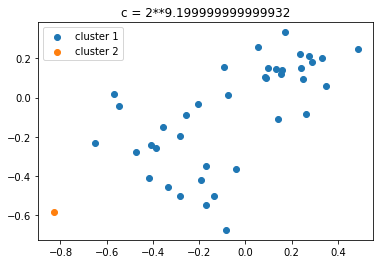

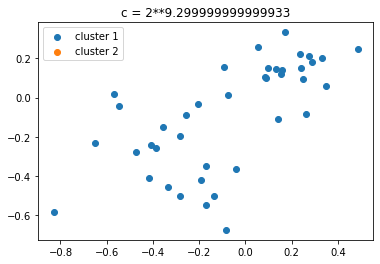

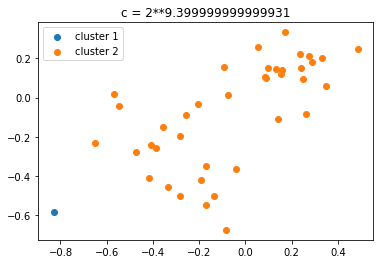

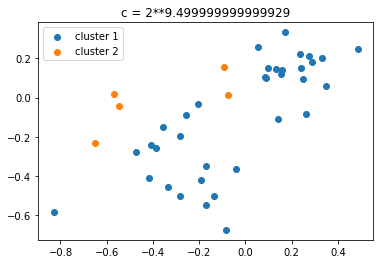

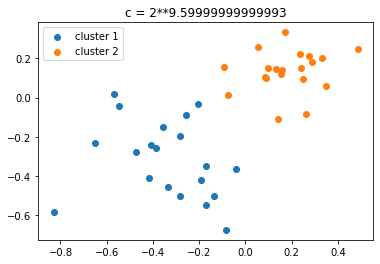

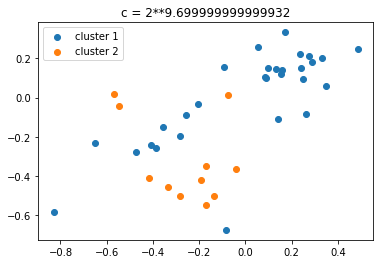

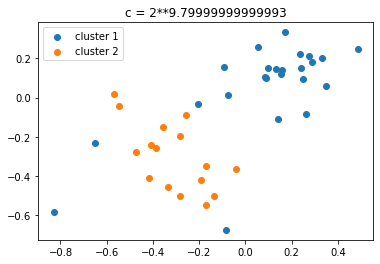

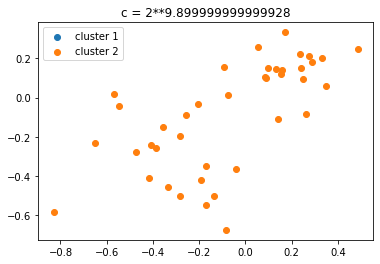

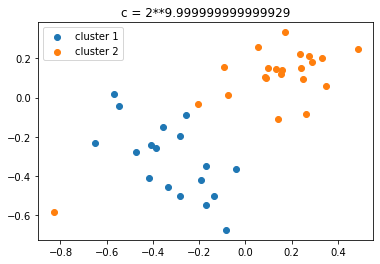

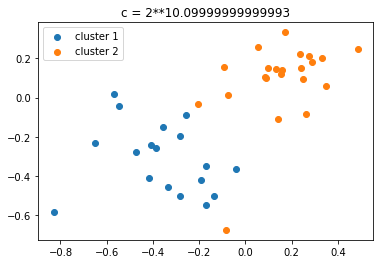

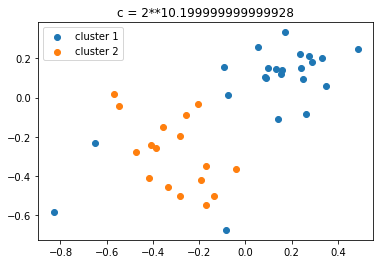

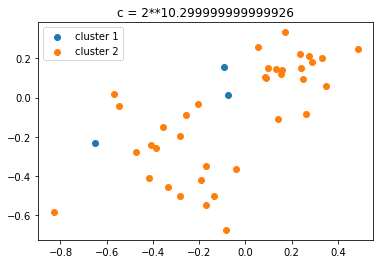

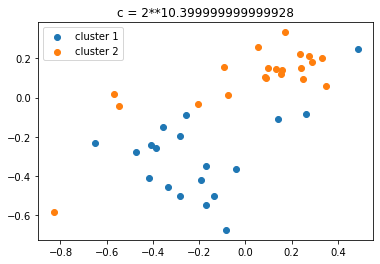

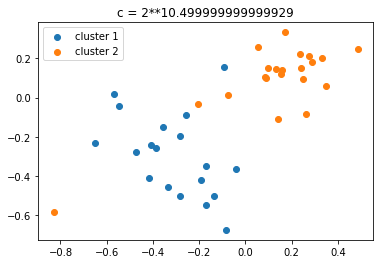

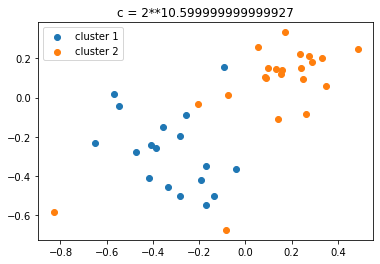

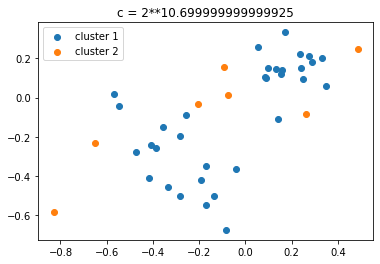

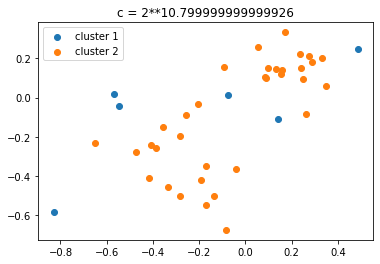

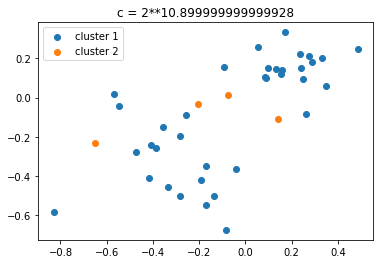

In [ ]:

X_1 = np.random.normal(loc = -.3, scale = 0.2, size = (20,2))
X_2 = np.random.normal(loc = .15, scale = 0.1, size = (20,2))

X = np.concatenate((X_1, X_2))

plt.figure()
plt.scatter(X_1, X_2)
plt.title('Plot of original randomly generated data')
plt.show()

sc = SpectralCluster(X, 0.1)
print(sc.cluster1)
print(sc.cluster2)


# why do we pick i = -3.3 (ie 0.1)? plots -3.6 to -1.2 have the correct results
for i in np.arange(start=-10, stop=11, step=0.1):
  sc = SpectralCluster(X, 2**i)

  x_cluster1 = X[list(sc.cluster1)]
  x_cluster2 = X[list(sc.cluster2)]

  plt.figure()
  plt.scatter(x_cluster1[:,0], x_cluster1[:,1], label="cluster 1")
  plt.scatter(x_cluster2[:,0], x_cluster2[:,1], label="cluster 2")
  plt.title(f"Plot of spectral clustering for c = 2**{i}")
  plt.legend()
  plt.show()


Q3)

In [ ]:
dtrain = pd.read_csv('dtrain123.dat', header = None, delim_whitespace=True)

In [ ]:
ones = dtrain[dtrain[0] == 1.0].to_numpy()[:,1:]
threes = dtrain[dtrain[0] == 3.0].to_numpy()[:,1:]

X = np.concatenate((ones, threes))
# we're meant to use c [0.01, ..., 0.1]
sc = SpectralCluster(X, 1)
print(list(sc.cluster1))
print(list(sc.cluster2))

[0, 128, 130, 4, 132, 133, 134, 8, 135, 138, 12, 140, 17, 145, 19, 148, 149, 150, 152, 153, 154, 27, 29, 157, 158, 32, 159, 161, 163, 38, 166, 167, 169, 44, 45, 174, 47, 176, 49, 50, 178, 179, 181, 54, 183, 184, 58, 188, 61, 189, 63, 68, 70, 72, 74, 76, 78, 86, 89, 90, 91, 92, 94, 97, 98, 121, 122, 124, 125, 127]
[1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 16, 18, 20, 21, 22, 23, 24, 25, 26, 28, 30, 31, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 46, 48, 51, 52, 53, 55, 56, 57, 59, 60, 62, 64, 65, 66, 67, 69, 71, 73, 75, 77, 79, 80, 81, 82, 83, 84, 85, 87, 88, 93, 95, 96, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 123, 126, 129, 131, 136, 137, 139, 141, 142, 143, 144, 146, 147, 151, 155, 156, 160, 162, 164, 165, 168, 170, 171, 172, 173, 175, 177, 180, 182, 185, 186, 187]


In [ ]:
#This function abuses the fact that all ones come first and all threes come after 
def calculate_CP_error(cluster_1: list, length_1: int, total_length: int):
    ''' 
    cluster_1 should be the cluster that predicts 1s.
    length_1 should be the number of ones in the dataset
    total_length should be length_1 + length_3, i.e the length of the full dataset
    '''
    l_plus = 0
    l_minus = 0
    for i in cluster_1:
        if i < length_1:
            l_plus +=1
        else:
            l_minus +=1
    
    #cluster 2 must have the remaining 1s not classified
    l_minus += length_1 - l_plus
    
    #The rest must be correctly labeled
    l_plus = total_length - l_minus 

    return max(l_minus, l_plus)/total_length

In [ ]:
print(calculate_CP_error(list(sc.cluster1), len(ones), len(X)))

0.6578947368421053


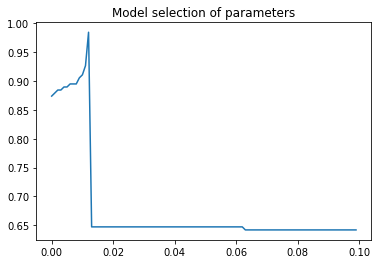

0.01200001


In [ ]:
ones = dtrain[dtrain[0] == 1.0].to_numpy()[:,1:]
threes = dtrain[dtrain[0] == 3.0].to_numpy()[:,1:]

X = np.concatenate((ones, threes))

cs = np.arange(start=0.00000001, stop=0.1, step=0.001)
cps = []
for c in cs:
  sc = SpectralCluster(X, c)
  cps.append(calculate_CP_error(list(sc.cluster1), len(ones), len(X)))

plt.plot(cs, cps)
plt.title("Model selection of parameters")
plt.show()

best_cp = np.argmax(cps)
best_c = cs[best_cp]
print(best_c)

Intuition Behind Spectral Clustering:

The weight matrix can be interpreted as a weighted undirected graph. Each weight $W_{i,j} = W_{j,i}$ and should be interpreted as the similarity between data point *i* and *j*.

The "degree" of data point i, given by $D_{i} $ of matrix D is given by the sum of the weights for any $x_{i}$ in $X$. Intuitively, a higher D implies a higher confidence?

Note that the Laplacian Graph is agnostic to the diagonal elements of W. 



1.



2.

All eigenvalues for a real positive symmetric matrix $A$ can be given as positive real numbers. This is true because for any vector $u$ such that $Av = -\lambda u $ for some $\lambda \geq 0$, one can choose the eigenvector $v = -u$ with corresponding positive eigenvalue.

The first eigenvector corresponds to the vector of ones. This is because The vector of ones when passed to W yields vector b such that $ b_{i} = \sum_{j}W_{i,j}$. Hence $(Db - Wb)_{i} = (\sum_{j}W_{i,j} - \sum_{j}W_{i,j}) \; \forall i $.

\\

As this maps to the 0 vector, this is the smallest eigenvalue.

\\
3.


The RatioCut solution is one way to separate data into clusters by minimizing the cumulative weight between all pairs of distinct partitions. More formally, the RatioCut solution corresponds to: 

$\min_{A_1, A_2, ... A_k} \sum_{i=1}^k \frac{W(A_{i}, \overline{A}_i)}{|A_{i}|}  : \\
A_{i} \cap A_{j} = \emptyset \; \forall (i \neq j) \in \{1:k\}, \;  \cup_{i}^{k} A_{i} = V $

Where V is the whole set.

\\

For the k = 2 case, it can be shown that this problem is equivalent to:

$\min_{A \in V} (f'Lf) $

$\; \text{s.t} \; f \cdot \mathbb{1}^{n} = 0, \; ||f|| = \sqrt{n} $

Where $f_i :=
\begin{cases}
\sqrt{\frac{|\overline{A}|}{|A|}} \; \text{if} \; v_{i} \in A \\
-\sqrt{\frac{|A|}{|\overline{A}|}} \; \text{if} \; v_{i} \in \overline{A}
\end{cases} $

\\

The approximation to the above is given by:

$\min_{f \in \mathbb{R}^{n}} (f'Lf) $

$\; \text{s.t} \; f \cdot \mathbb{1}^{n} = 0, \; ||f|| = \sqrt{n} $

It is an approximation because the actual solution is in the discrete domain, but is an NP hard problem to solve. If the constraint is relaxed to the real domain, the solution becomes analytically tractable in a closed form.

\\

From the Rayleigh-Ritz Quotient theorem, it follows that the eigenvector corresponding to the smallest eigenvalue of $L$ is given by $\min_{f \in \mathbb{R}^{n}} (f'Lf) $. In the constrained problem where $ f \cdot \mathbb{1}^{n} = 0, \; ||f|| = \sqrt{n} $, this now corresponds to the second smallest eigenvalue (since the smallest is 0 and the corresponding eigenvector is $\mathbb{1}^{n}$).

\\

Short answer: \\
Spectral clustering is more easily explained in the context of the Ratio-Cut problem, which is what the spectral clustering algorithm finds an approximate solution to. The ratio-cut problem can be described as finding a partition of the points such that in the fully connected graph between points, weights of links between points in distinct partitions are minimized (normalized by the size of the partition -i.e penalizing larger groups less). It turns out that this is an NP problem and can be reformulated in terms of minimizing $(f'Lf) $ where $f$ is a vector defined by the partition to which it belongs (positive if belonging to group 1 and negative to group 2). However, by reformulating the problem slightly by unrestricting the domain of solutions to $\mathbb{R^n}$ and adding the restriction $f^T \mathbb{1}^{n} = 0, \; ||f|| = \sqrt{n}$, the solution can be approximated and is solvable in polynomial time. It turns out this solution is given by the eigenvector corresponding to the second smallest eigenvalue of L, (since $\mathbb{1}^{n}$ will always have eigenvector 0 and will therefore correspond to the eigenvector to the smallest eigenvalue). Since the approximation will be close to the true solution, a sign function is a reasonable way to assign the groupings.  
\\

4.
$\sigma$ ifluences the weight of the link in the undirected graph. The gaussian similarity is meant to measure how close points are to one another and is given by $ e^{-\sigma ||x_i - x_j||^2} $. This means that larger values of sigma penalizes distance between points more. 





